<a href="https://colab.research.google.com/github/py222015328/CEE2/blob/main/21_uso_dados_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Uso de dados de APIs

API é a sigla para *Application Programming Interface* (em português, Interface de Programação de Aplicações).
Trata-se de um conjunto de definições e protocolos que permitem que diferentes sistemas ou softwares se comuniquem entre si, de forma padronizada, sem que um precise conhecer os detalhes internos do outro.

## Bibliotecas

O acesso a dados de API's pode ser feito utilizando a biblioteca `requests`, que deve ser instalada, caso ainda não esteja:
```python
pip install requests
```








## Formato de dados

A maior parte das API's modernas fornecem dados em formato JSON, sendo que no passado o formato mais utilizado era o XML (*Extensible Markup Language*), sendo este segundo um sistema mais pesado que o JSON.

Algumas API's também podem fornecer dados em formato CSV (*Comma-Separated Values*), especialmente para dados tabulares.


### JSON

O formato JSON (*JavaScript Object Notation*) é uma estrutura de dados leve e baseada em texto, usada para a troca de informações entre sistemas. Ele organiza os dados em pares de chave-valor que são agrupados em objetos ({}) ou arrays ([]). As chaves devem ser strings delimitadas por aspas duplas, enquanto os valores podem ser números, strings, booleanos, arrays, objetos ou `null`. Os arrays são listas ordenadas de valores, enquanto os objetos são coleções de pares de chave-valor não ordenadas.

***Exemplo***

No exemplo abaixo, o objeto principal contém um campo `"dados"`, que é uma lista de objetos.

Cada objeto dentro da lista representa um município com os seguintes atributos:
- "municipio": Nome do município.
- "estado": Sigla do estado ao qual o município pertence.
- "populacao": População total do município.
- "area_km2": Área territorial em quilômetros quadrados.
- "indicadores": Um objeto contendo:
  - "idh": Índice de Desenvolvimento Humano (IDH).
  - "renda_per_capita": Renda per capita média.
  - "taxa_alfabetizacao": Taxa de alfabetização em percentual.

```python
{
  "dados": [
    {
      "municipio": "São Paulo",
      "estado": "SP",
      "populacao": 12396372,
      "area_km2": 1521.11,
      "indicadores": {
        "idh": 0.805,
        "renda_per_capita": 3872.0,
        "taxa_alfabetizacao": 97.5
      }
    },
    {
      "municipio": "Rio de Janeiro",
      "estado": "RJ",
      "populacao": 6775561,
      "area_km2": 1182.30,
      "indicadores": {
        "idh": 0.799,
        "renda_per_capita": 3221.5,
        "taxa_alfabetizacao": 96.2
      }
    },
    {
      "municipio": "Belo Horizonte",
      "estado": "MG",
      "populacao": 2530701,
      "area_km2": 330.954,
      "indicadores": {
        "idh": 0.810,
        "renda_per_capita": 2765.9,
        "taxa_alfabetizacao": 97.8
      }
    }
  ]
}
```

### Como Funciona

Quando você faz uma requisição HTTP com `requests.get()`, o conteúdo da resposta geralmente está no formato de texto bruto.

O método `.json()` interpreta esse texto como JSON e o converte automaticamente em objetos nativos do Python.
- Objetos JSON se tornam dicionários em Python.
- Arrays JSON se tornam listas em Python.
- Valores JSON como números, strings, booleans e null são convertidos em seus equivalentes no Python.

> Dica: A biblioteca `pprint` possui a função `pprint` que permite apresenta o resultado dessa conversão de um modo organizado.

---
## API do IBGE

A API do IBGE fornece dados sobre populações, territórios, economia, e muito mais.

A documentação da API do IBGE está disponível em: https://servicodados.ibge.gov.br/api/docs. Nesta página, podemos obter os endereços URL's para fazer requisições de dados do IBGE utilizando o Python.

> ***QUERY BUILDER:*** Dentro da página, escolha uma das divisões da API disponíveis, então você pode utilizar o menu `QUERY BUILDER` para personalizar o link conforme seu interesse.


> Exemplo: Vamos usar a API para acessar dados de municípios brasileiros.


***Exemplo 1:*** Listar munícios por UF

Aqui está um exemplo de como obter uma lista de municípios de um estado específico.

Para obter a URL para a requisição acessamos na página:
>  "Localidades" -> Campo MUNICIPIOS, menu "Municípios por UF".

> Os códigos de estados e municípios estão disponíveis em https://www.ibge.gov.br/explica/codigos-dos-municipios.php.

In [ ]:
import requests

# URL para obter municípios de um estado
estado = 35  # Código do estado (São Paulo = 35)
url = f"https://servicodados.ibge.gov.br/api/v1/localidades/estados/{estado}/municipios"

# Fazendo a requisição
response = requests.get(url)

print( "type(response):", type(response) )

type(response): <class 'requests.models.Response'>


In [ ]:
# Checando o status da requisição e interpretando o JSON
if response.status_code == 200:

    municipios = response.json() ## interpretando a saída como JSON

    print( "\n\nTipo de dados:", type(municipios) )

    print( "\n\nPrimeiros 3 elementos:", type(municipios) )
    print( municipios[:3] )

    print( "\n\nPrimeiros 3 elementos (pprint):")
    import pprint
    pprint.pprint(municipios[:3])

    print( "\n\nAcessando atributos de cada elemento:" )

    print(f"\n Total de municípios: {len(municipios)}")

    print("\n Nome dos 5 primeiros municípios:")

    for municipio in municipios[:5]:  # Mostra os primeiros 5 municípios
        print("  ", municipio['nome'])
else:
    print("Erro ao acessar a API do IBGE")




Tipo de dados: <class 'list'>


Primeiros 3 elementos: <class 'list'>
[{'id': 3500105, 'nome': 'Adamantina', 'microrregiao': {'id': 35035, 'nome': 'Adamantina', 'mesorregiao': {'id': 3508, 'nome': 'Presidente Prudente', 'UF': {'id': 35, 'sigla': 'SP', 'nome': 'São Paulo', 'regiao': {'id': 3, 'sigla': 'SE', 'nome': 'Sudeste'}}}}, 'regiao-imediata': {'id': 350019, 'nome': 'Adamantina - Lucélia', 'regiao-intermediaria': {'id': 3505, 'nome': 'Presidente Prudente', 'UF': {'id': 35, 'sigla': 'SP', 'nome': 'São Paulo', 'regiao': {'id': 3, 'sigla': 'SE', 'nome': 'Sudeste'}}}}}, {'id': 3500204, 'nome': 'Adolfo', 'microrregiao': {'id': 35004, 'nome': 'São José do Rio Preto', 'mesorregiao': {'id': 3501, 'nome': 'São José do Rio Preto', 'UF': {'id': 35, 'sigla': 'SP', 'nome': 'São Paulo', 'regiao': {'id': 3, 'sigla': 'SE', 'nome': 'Sudeste'}}}}, 'regiao-imediata': {'id': 350025, 'nome': 'São José do Rio Preto', 'regiao-intermediaria': {'id': 3507, 'nome': 'São José do Rio Preto', 'UF': {'id': 35

In [ ]:
# A biblioteca pandas pode ser utilizada para tabelar como um dataframe
##  Em Jupyter e Colab pode-se utilizar o comando display para ter uma apresentação
##  mais organizada que a função print
import pandas as pd

df = pd.DataFrame(municipios)

display(df)

,id,nome,microrregiao,regiao-imediata
0,3500105,Adamantina,"{'id': 35035, 'nome': 'Adamantina', 'mesorregi...","{'id': 350019, 'nome': 'Adamantina - Lucélia',..."
1,3500204,Adolfo,"{'id': 35004, 'nome': 'São José do Rio Preto',...","{'id': 350025, 'nome': 'São José do Rio Preto'..."
2,3500303,Aguaí,"{'id': 35029, 'nome': 'Pirassununga', 'mesorre...","{'id': 350044, 'nome': 'São João da Boa Vista'..."
3,3500402,Águas da Prata,"{'id': 35030, 'nome': 'São João da Boa Vista',...","{'id': 350044, 'nome': 'São João da Boa Vista'..."
4,3500501,Águas de Lindóia,"{'id': 35033, 'nome': 'Amparo', 'mesorregiao':...","{'id': 350048, 'nome': 'Amparo', 'regiao-inter..."
...,...,...,...,...
640,3557006,Votorantim,"{'id': 35046, 'nome': 'Sorocaba', 'mesorregiao...","{'id': 350003, 'nome': 'Sorocaba', 'regiao-int..."
641,3557105,Votuporanga,"{'id': 35003, 'nome': 'Votuporanga', 'mesorreg...","{'id': 350027, 'nome': 'Votuporanga', 'regiao-..."
642,3557154,Zacarias,"{'id': 35004, 'nome': 'São José do Rio Preto',...","{'id': 350023, 'nome': 'Birigui - Penápolis', ..."
643,3557204,Chavantes,"{'id': 35040, 'nome': 'Ourinhos', 'mesorregiao...","{'id': 350015, 'nome': 'Ourinhos', 'regiao-int..."


***Exemplo 2:*** Estimativa Populacional

O link abaixo foi construído utilizando a divisão "AGREGADOS" e o seguinte sequência para o "Query Builder":

1. Pesquisa: Estimativas de População
2. Períodos: Selecionar todos
3. Nível geográfico: N1 - Brasil

https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2001|2002|2003|2004|2005|2006|2008|2009|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2024/variaveis/9324?localidades=N1[all]


In [ ]:
import requests

url = "https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2001|2002|2003|2004|2005|2006|2008|2009|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2024/variaveis/9324?localidades=N1[all]"

# Fazendo a requisição
response = requests.get(url)

print( "type(response):", type(response) )

if response.status_code == 200:
  dados = response.json() ## interpretando a saída como JSON

  print( "\n\nTipo de dados:", type(dados) )

  ## Exibe uma descrição organizada da estrutura dos dados
  import pprint
  pprint.pprint(dados)

else:
  print("Erro ao acessar a API do IBGE")


type(response): <class 'requests.models.Response'>


Tipo de dados: <class 'list'>
[{'id': '9324',
  'resultados': [{'classificacoes': [],
                  'series': [{'localidade': {'id': '1',
                                             'nivel': {'id': 'N1',
                                                       'nome': 'Brasil'},
                                             'nome': 'Brasil'},
                              'serie': {'2001': '172385826',
                                        '2002': '174632960',
                                        '2003': '176871437',
                                        '2004': '181569056',
                                        '2005': '184184264',
                                        '2006': '186770562',
                                        '2008': '189605006',
                                        '2009': '191480630',
                                        '2011': '192379287',
                                        '2012': '19

In [ ]:
# Extraindo a série temporal
### Nessa etapa voce pode ir printando a estrutura e selecionando o elemento de interesse

pprint.pprint(dados[0]['resultados'][0]['series'][0]['serie'])

serie = dados[0]['resultados'][0]['series'][0]['serie']

{'2001': '172385826',
 '2002': '174632960',
 '2003': '176871437',
 '2004': '181569056',
 '2005': '184184264',
 '2006': '186770562',
 '2008': '189605006',
 '2009': '191480630',
 '2011': '192379287',
 '2012': '193904015',
 '2013': '201032714',
 '2014': '202768562',
 '2015': '204450049',
 '2016': '206081432',
 '2017': '207660929',
 '2018': '208494900',
 '2019': '210147125',
 '2020': '211755692',
 '2021': '213317639',
 '2024': '212583750'}


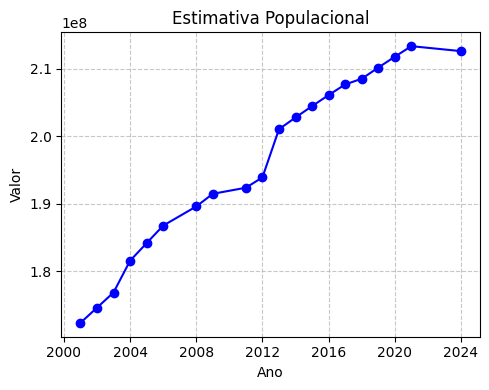

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertendo para um DataFrame do pandas
df = pd.DataFrame(list(serie.items()), columns=['Year', 'Value'])
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Convertendo anos para datetime
df['Value'] = pd.to_numeric(df['Value'])  # Convertendo valores para numérico

# Criando o gráfico
plt.figure(figsize=(5, 4))
plt.plot(df['Year'], df['Value'], marker='o', linestyle='-', color='b', label='Estimativa Populacional')
plt.title('Estimativa Populacional')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend()
plt.tight_layout()
plt.show()

### Exercício 1

Crie um código que baixe e apresente informações de "Localidade" do Distrito Federal utilizando a API do IBGE.


In [ ]:
import requests
import pandas as pd

# Localidades
estado = 53
url = f"https://servicodados.ibge.gov.br/api/v1/localidades/estados/{estado}/microrregioes"

response = requests.get(url)

if response.status_code == 200:
    brasilia = response.json()

df = pd.DataFrame(brasilia)
display(df)

,id,nome,distrito
0,53001080506,Plano Piloto,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
1,53001080507,Gama,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
2,53001080508,Taguatinga,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
3,53001080509,Brazlândia,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
4,53001080510,Sobradinho,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
5,53001080511,Planaltina,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
6,53001080512,Paranoá,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
7,53001080513,Riacho Fundo,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
8,53001080514,Núcleo Bandeirante,"{'id': 530010805, 'nome': 'Brasília', 'municip..."
9,53001080515,Ceilândia,"{'id': 530010805, 'nome': 'Brasília', 'municip..."


---
## API do Banco Central

O Banco Central do Brasil fornece uma API chamada "Serviço de Dados Abertos" para acessar informações financeiras, como taxas de câmbio e boletins econômicos.

A documentação da API do Banco Central está disponível em:
https://dadosabertos.bcb.gov.br

***Exemplo 1:*** Cotação do dólar


Para obter o histórico da cotação do dólar, vamos executar os seguintes passos:

1. Pesquisar "Cotação do dólar" na página da documentação https://dadosabertos.bcb.gov.br

2. Clique em `Dólar comercial (venda e compra) - cotações diárias`.

3. No canto superior direito, clique em `Ponto de Acesso à API`.

4. No tópico `Cotação do Dólar por período` clique em `Explorar`.

5. Preencha as informações sobre o intervalo de datas no formulário, utilize o forma MM-DD-AAAA.

  * Como exemplo foi preenchido, `Data inicial = 01-01-2025` e `Data final = 01-20-2024`.

5. Copie a URL que foi gerada.

  * No exemplo, temos:

```http
  https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-01-2025'&@dataFinalCotacao='01-20-2025'&$top=100&$format=json
```

> Note que esta URL é utilizada no código abaixo para baixar a série histórica da cotação do dólar.


In [ ]:
import requests
from datetime import datetime

# URL para taxas de câmbio
data_inicial = "01-01-2025" ## MM-DD-AAAA
data_final = "01-20-2025"   ## MM-DD-AAAA
url = f"https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinal)?@dataInicial='{data_inicial}'&@dataFinal='{data_final}'&$format=json"

# Fazendo a requisição
response = requests.get(url)

# Checando o status
if response.status_code == 200:

    dados = response.json()

    import pprint
    pprint.pprint(dados)

    print("\n\nPreços de compra:")
    dados_cambio = dados['value']
    for dia in dados_cambio:
        print(f"Data: {dia['dataHoraCotacao']}, Valor: {dia['cotacaoCompra']}")
else:
    print("Erro ao acessar a API do Banco Central")

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata$metadata#_CotacaoDolarPeriodo',
 'value': [{'cotacaoCompra': 6.208,
            'cotacaoVenda': 6.2086,
            'dataHoraCotacao': '2025-01-02 13:09:42.489'},
           {'cotacaoCompra': 6.1557,
            'cotacaoVenda': 6.1563,
            'dataHoraCotacao': '2025-01-03 13:07:30.503'},
           {'cotacaoCompra': 6.1113,
            'cotacaoVenda': 6.1119,
            'dataHoraCotacao': '2025-01-06 13:06:28.533'},
           {'cotacaoCompra': 6.0735,
            'cotacaoVenda': 6.0741,
            'dataHoraCotacao': '2025-01-07 13:03:28.766'},
           {'cotacaoCompra': 6.1315,
            'cotacaoVenda': 6.1321,
            'dataHoraCotacao': '2025-01-08 13:08:59.784'},
           {'cotacaoCompra': 6.089,
            'cotacaoVenda': 6.0896,
            'dataHoraCotacao': '2025-01-09 13:03:27.828'},
           {'cotacaoCompra': 6.0959,
            'cotacaoVenda': 6.0965,
            'dataH

Podemos desempacotar as informações para um DataFrame do Pandas.

Para isto, bastar selecionar selecionar o elemento 'value' do JSON. Veja o exemplo no código abaixo.

In [ ]:
# Para tabular as informações podemos utilizar Pandas
import pandas as pd

df = pd.DataFrame( dados['value'] )
print( df )

    cotacaoCompra  cotacaoVenda          dataHoraCotacao
0          6.2080        6.2086  2025-01-02 13:09:42.489
1          6.1557        6.1563  2025-01-03 13:07:30.503
2          6.1113        6.1119  2025-01-06 13:06:28.533
3          6.0735        6.0741  2025-01-07 13:03:28.766
4          6.1315        6.1321  2025-01-08 13:08:59.784
5          6.0890        6.0896  2025-01-09 13:03:27.828
6          6.0959        6.0965  2025-01-10 13:04:30.342
7          6.1073        6.1079  2025-01-13 13:03:30.256
8          6.0665        6.0671  2025-01-14 13:07:27.066
9          6.0371        6.0377  2025-01-15 13:06:07.747
10         6.0316        6.0322  2025-01-16 13:06:28.873
11         6.0603        6.0609  2025-01-17 13:11:29.354
12         6.0492        6.0498  2025-01-20 13:07:31.452


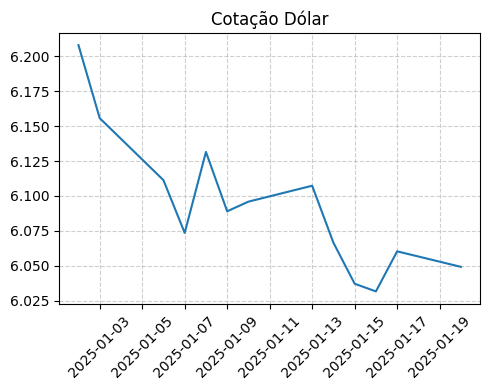

In [ ]:
# Criando o gráfico
import matplotlib.pyplot as plt

  ## Convertendo a coluna 'dataHoraCotacao' para datetime
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'])

  ## Remove informações de horário
df['dataHoraCotacao'] = df['dataHoraCotacao'].dt.date

plt.figure(figsize=(5, 4))
plt.plot(df['dataHoraCotacao'], df["cotacaoCompra"])
plt.title('Cotação Dólar')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotaciona os rótulos para evitar sobreposição
plt.tight_layout()
plt.show()

### Exercício 2

Crie um código que baixe e apresente informações da série temporal diária da "Taxa de juros - Selic" entre 01/01/2010 até 20/01/2025.

> Link para a documentação da API: https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic/resource/b73edc07-bbac-430c-a2cb-b1639e605fa8




Dataframe:


,data,valor
0,2015-01-02,0.043739
1,2015-01-05,0.043739
2,2015-01-06,0.043739
3,2015-01-07,0.043739
4,2015-01-08,0.043739
...,...,...
2503,2024-12-24,0.045513
2504,2024-12-26,0.045513
2505,2024-12-27,0.045513
2506,2024-12-30,0.045513


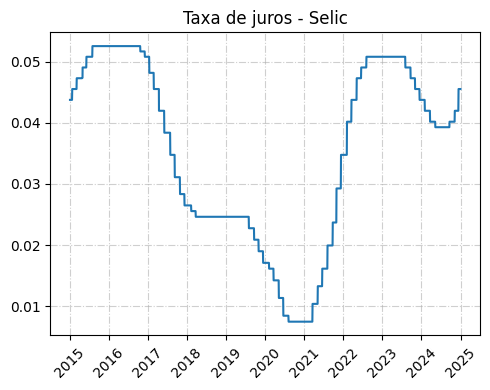

In [42]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

data_inicial = "01/01/2015"
data_final = "31/12/2024" # A diferença entre dataFinal e dataInicial não deve ser superior a 10 anos.
url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'


response = requests.get(url)
if response.status_code == 200:
    dados = response.json()
    # Tranformação em dataframe
    df = pd.DataFrame(data=dados)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = df['valor'].astype(float)
    print('Dataframe:')
    display(df)

    # Criação do gráfico
    plt.figure(figsize=(5, 4))
    plt.plot(df['data'], df["valor"])
    plt.title('Taxa de juros - Selic')
    plt.grid(True, linestyle='-.', alpha=0.6)
    plt.xticks(rotation=45)  # Rotaciona os rótulos para evitar sobreposição
    plt.tight_layout()
    plt.show()

else:
    print("Erro ao acessar a API do Banco Central")